<a href="https://colab.research.google.com/github/Allen123321/DEMO-DL/blob/master/SVM%E5%A4%9A%E7%9B%AE%E6%A0%87%E5%B1%9E%E6%80%A7%E5%88%86%E7%B1%BB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import time 
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

from sklearn.datasets import make_multilabel_classification
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import LabelBinarizer
from sklearn.decomposition import PCA
from sklearn.cross_decomposition import CCA



In [2]:
def plot_hyperplane(clf,min_x,max_x,linestyle,label):
  ## 这里的clf可以就看做是一个svm分类器
  ## 获取一个线性核的情况下的参数系数值
  w = clf.coef_[0]
  a = -w[0]/w[1] 
  ## 产生随机的x的值
  xx = np.linspace(min_x - 5,max_x + 5)
  ##计算Y值
  yy = a*xx - (clf.intercept_[0])/w[1]
  plt.plot(xx,yy,linestyle,label = label) 
  

In [18]:
def plot_subfigure(X,Y,subplot,title,transform):
  ##进行特征降维
  if transform == 'pca':
    X = PCA(n_components=2).fit_transform(X)
  elif transform == 'cca':
    X = CCA(n_components=2).fit(X,Y).transform(X)
  else:
    raise ValueError

  min_x = np.min(X[:,0])
  max_x = np.max(X[:,0])

  min_y = np.min(X[:,1])
  max_y = np.max(X[:,1])
  ## 多分类使用OneVsRestClassifier进行多个目标的分类问题的专门算法API
  classif = OneVsRestClassifier(SVC(kernel='linear'))
  classif.fit(X,Y)

  print(title,'acc:',classif.score(X,Y))

  ##画图
  plt.subplot(2,2,subplot)
  plt.title(title)

  zero_class = np.where(Y[:,0])
  one_class = np.where(Y[:,1])
  ## 画出所有样本点，大小40，颜色灰色
  plt.scatter(X[:, 0], X[:, 1], s=40, c='gray')
  plt.scatter(X[zero_class,0],X[zero_class,1],s=160,edgecolors='blue',facecolors = 'none',linewidths=2,label=u'class_1')
  plt.scatter(X[one_class,0],X[one_class,1],s=80,edgecolors='orange',facecolors = 'none',linewidths=2,label=u'class_2')
  ## 画出分割线（并获取对应类别的决策/预测估计函数）
  plot_hyperplane(classif.estimators_[0], min_x, max_x, 'k--', u'class_1 boundary')
  plot_hyperplane(classif.estimators_[1], min_x, max_x, 'r-.', u'class_2 boundary')
  ## 设置没有坐标轴内容
  plt.xticks(())
  plt.yticks(())
  ## 设置取值范围
  plt.xlim(min_x - .5 * max_x, max_x + .5 * max_x)
  plt.ylim(min_y - .5 * max_y, max_y + .5 * max_y)
  if subplot == 4:
    ## 最后一个图表进行label展示
    plt.xlabel(u'first PCA')
    plt.ylabel(u'Second PCA')
    plt.legend(loc="lower right")






Contains sample data of uncertain categories + CCA acc: 0.9
Contains sample data of uncertain categories + PCA acc: 0.74
Does not include sample data for uncertain categories + CCA acc: 0.98
Does not include sample data for uncertain categories + PCA acc: 0.94


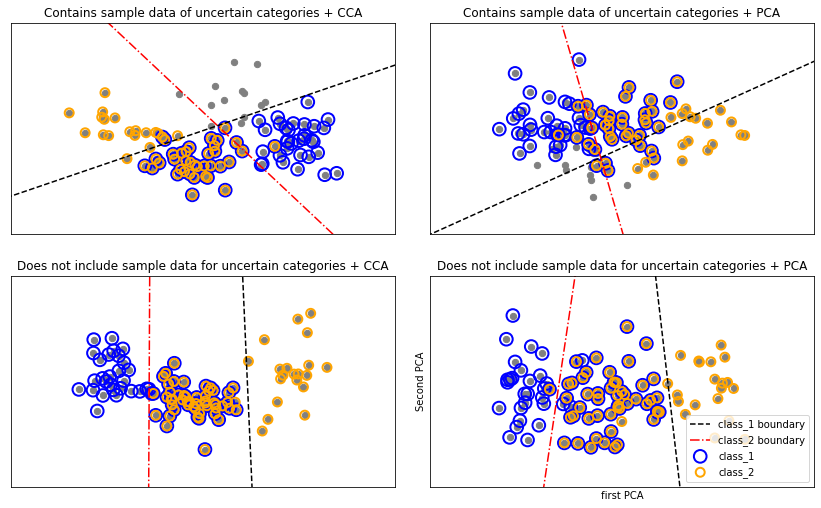

In [19]:
plt.figure(figsize=(12, 7), facecolor='w')
## 产生一个多分类问题的原始数据，样本数量100，特征属性30，预测类别两个，每个类别的label数为2，允许存在不属于任何类别的示例
X, Y = make_multilabel_classification(n_samples=100, n_features=30,
                                      n_classes=2, n_labels=2,
                                      allow_unlabeled=True,
                                      return_indicator=True,
                                      random_state=28)
## 进行模型训练及数据展示
plot_subfigure(X, Y, 1, u"Contains sample data of uncertain categories + CCA", "cca")
plot_subfigure(X, Y, 2, u"Contains sample data of uncertain categories + PCA", "pca")


## 产生一个多分类问题的原始数据，样本数量100，特征属性30，预测类别两个，每个类别的label数为2，不允许存在不属于任何类别的示例
X, Y = make_multilabel_classification(n_samples=100,  n_features=30,
                                      n_classes=2, n_labels=2,
                                      allow_unlabeled=False,
                                      return_indicator=True,
                                      random_state=28)
## 进行模型训练及数据展示
plot_subfigure(X, Y, 3, u"Does not include sample data for uncertain categories + CCA", "cca")
plot_subfigure(X, Y, 4, u"Does not include sample data for uncertain categories + PCA", "pca")

## 图表展示
plt.subplots_adjust(.04, .02, .97, .94, .09, .2)
plt.show()
